In [3]:
from __future__ import division, print_function
import kf_book.pf_internal as pf_internal
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import uniform
from filterpy.stats import plot_gaussian_pdf
import csv
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [9]:
from numpy.random import uniform

def create_uniform_particles(x_range, y_range, hdg_range, N):
    particles = np.empty((N, 3))
    particles[:, 0] = uniform(x_range[0], x_range[1], size=N)
    particles[:, 1] = uniform(y_range[0], y_range[1], size=N)
    particles[:, 2] = uniform(hdg_range[0], hdg_range[1], size=N)
    particles[:, 2] %= 2 * np.pi
    return particles

def create_gaussian_particles(mean, std, N):
    particles = np.empty((N, 3))
    particles[:, 0] = mean[0] + (randn(N) * std[0])
    particles[:, 1] = mean[1] + (randn(N) * std[1])
    particles[:, 2] = mean[2] + (randn(N) * std[2])
    particles[:, 2] %= 2 * np.pi
    return particles

In [10]:
########################
##### Predict Step #####
########################

def predict(particles, u, std, dt=1.):
    """ move according to control input u (heading change, velocity)
    with noise Q (std heading change, std velocity)`"""

    N = len(particles)
    # update heading
    particles[:, 2] += u[0] + (randn(N) * std[0])
    particles[:, 2] %= 2 * np.pi

    # move in the (noisy) commanded direction
    dist = (u[1] * dt) + (randn(N) * std[1])
    particles[:, 0] += np.cos(particles[:, 2]) * dist
    particles[:, 1] += np.sin(particles[:, 2]) * dist

In [11]:
#######################
##### Update Step #####
#######################


def update(particles, weights, z, R, landmarks):
    for i, landmark in enumerate(landmarks):
        distance = np.linalg.norm(particles[:, 0:2] - landmark, axis=1)
        weights *= scipy.stats.norm(distance, R).pdf(z[i])

    weights += 1.e-300      # avoid round-off to zero
    weights /= sum(weights) # normalize

In [12]:
#################################
##### State Estimation Step #####
#################################

def estimate(particles, weights):
    """returns mean and variance of the weighted particles"""

    pos = particles[:, 0:2]
    mean = np.average(pos, weights=weights, axis=0)
    var  = np.average((pos - mean)**2, weights=weights, axis=0)
    return mean, var

In [13]:
#############################
#### Particle Resampling ####
#############################

def simple_resample(particles, weights):
    N = len(particles)
    cumulative_sum = np.cumsum(weights)
    cumulative_sum[-1] = 1. # avoid round-off error
    indexes = np.searchsorted(cumulative_sum, random(N))

    # resample according to indexes
    particles[:] = particles[indexes]
    weights.fill(1.0 / N)
    
def resample_from_index(particles, weights, indexes):
    particles[:] = particles[indexes]
    weights[:] = weights[indexes]
    weights.fill(1.0 / len(weights))    

def neff(weights):
    return 1. / np.sum(np.square(weights))

In [74]:
####################################
#### Transition Matrix Training ####
####################################

agenttrace = '../4jul11p.csv'
f = open(agenttrace)
#print(f.readlines)
oracle = []
gridized_data = []
gridsize = 0.5

xbins = 12
ybins = 20

# Based on Smart Condo Dimension and orientation:
TMatrix = np.zeros((xbins * ybins, xbins * ybins + 1))
TLookupTable = []

for x in range(xbins):
    for y in range(ybins):
        TLookupTable.append(str(x) + "," + str(y))
        
with open(agenttrace, 'r') as user_data:
    reader = csv.reader(user_data, delimiter=',', quotechar=',')
    for row in reader:
        if (reader.line_num > 1):
            oracle.append([float(row[4]), float(row[5])])
            
for d in oracle:
    gridized_data.append([int(np.floor(d[0]/gridsize)), int(np.floor(d[1]/gridsize))])        
    
for x in range(xbins):
    for y in range(ybins):
        # find (x, y)s in gridized_data
        indices = [i for i, l in enumerate(gridized_data) if l == [x, y]]
        
        # foreach (x, y): find their next successor; N = total number of successors 
        if not indices:
            print("Agent was not in location [" + str(x) + ", " + str(y) + "] at all")
        else:
            for index in indices:
                print(index + 1)
        
        # foreach successor: n = count repeat number
        # foreach successor: p[(x, y) -> successor] = n / N

Agent was not in location [0, 0] at all
Agent was not in location [0, 1] at all
Agent was not in location [0, 2] at all
Agent was not in location [0, 3] at all
Agent was not in location [0, 4] at all
Agent was not in location [0, 5] at all
Agent was not in location [0, 6] at all
Agent was not in location [0, 7] at all
Agent was not in location [0, 8] at all
Agent was not in location [0, 9] at all
Agent was not in location [0, 10] at all
Agent was not in location [0, 11] at all
Agent was not in location [0, 12] at all
Agent was not in location [0, 13] at all
Agent was not in location [0, 14] at all
Agent was not in location [0, 15] at all
Agent was not in location [0, 16] at all
Agent was not in location [0, 17] at all
Agent was not in location [0, 18] at all
Agent was not in location [0, 19] at all
Agent was not in location [1, 0] at all
Agent was not in location [1, 1] at all
Agent was not in location [1, 2] at all
Agent was not in location [1, 3] at all
Agent was not in location [1, 

6770
shadan:6770
6771
shadan:6771
6772
shadan:6772
6773
shadan:6773
6774
shadan:6774
6775
shadan:6775
6776
shadan:6776
6777
shadan:6777
6778
shadan:6778
6779
shadan:6779
6780
shadan:6780
6781
shadan:6781
6782
shadan:6782
6783
shadan:6783
6784
shadan:6784
6785
shadan:6785
6786
shadan:6786
6787
shadan:6787
6788
shadan:6788
6789
shadan:6789
6790
shadan:6790
6791
shadan:6791
6792
shadan:6792
6793
shadan:6793
6794
shadan:6794
6795
shadan:6795
6796
shadan:6796
6797
shadan:6797
6798
shadan:6798
6799
shadan:6799
6800
shadan:6800
6801
shadan:6801
6802
shadan:6802
6803
shadan:6803
6804
shadan:6804
6805
shadan:6805
6806
shadan:6806
6807
shadan:6807
6808
shadan:6808
6809
shadan:6809
6810
shadan:6810
6811
shadan:6811
6812
shadan:6812
6813
shadan:6813
6814
shadan:6814
6815
shadan:6815
6816
shadan:6816
6817
shadan:6817
6818
shadan:6818
6819
shadan:6819
6820
shadan:6820
6821
shadan:6821
6822
shadan:6822
6823
shadan:6823
6824
shadan:6824
6825
shadan:6825
6826
shadan:6826
6827
shadan:6827
6828
shadan:68

Agent was not in location [1, 8] at all
Agent was not in location [1, 9] at all
Agent was not in location [1, 10] at all
Agent was not in location [1, 11] at all
Agent was not in location [1, 12] at all
shadan:2368
2369
shadan:2572
2573
shadan:2573
2574
shadan:2574
2575
shadan:2575
2576
shadan:2576
2577
shadan:2584
2585
shadan:2585
2586
shadan:2586
2587
shadan:2587
2588
shadan:2588
2589
shadan:2589
2590
shadan:2590
2591
shadan:2591
2592
shadan:2592
2593
shadan:2593
2594
shadan:2594
2595
shadan:2595
2596
shadan:2596
2597
shadan:2597
2598
shadan:2598
2599
shadan:2599
2600
shadan:2600
2601
shadan:2601
2602
shadan:2602
2603
shadan:2603
2604
shadan:2604
2605
shadan:2605
2606
shadan:2606
2607
shadan:2607
2608
shadan:2608
2609
shadan:2609
2610
shadan:2610
2611
shadan:2611
2612
shadan:2612
2613
shadan:2613
2614
shadan:2919
2920
shadan:2920
2921
shadan:2921
2922
shadan:2922
2923
shadan:2923
2924
shadan:2369
2370
shadan:2370
2371
shadan:2371
2372
shadan:2372
2373
shadan:2373
2374
shadan:2374
237

shadan:5075
5076
shadan:5076
5077
shadan:5077
5078
shadan:5078
5079
shadan:5079
5080
shadan:5080
5081
shadan:5081
5082
shadan:5082
5083
shadan:5083
5084
shadan:5084
5085
shadan:5085
5086
shadan:5086
5087
shadan:5087
5088
shadan:5088
5089
shadan:5089
5090
shadan:5090
5091
shadan:5091
5092
shadan:5092
5093
shadan:5093
5094
shadan:5094
5095
shadan:5095
5096
shadan:5096
5097
shadan:5097
5098
shadan:5098
5099
shadan:5099
5100
shadan:5100
5101
shadan:5101
5102
shadan:5102
5103
shadan:5103
5104
shadan:5104
5105
shadan:5105
5106
shadan:5106
5107
shadan:5107
5108
shadan:5108
5109
shadan:5109
5110
shadan:5110
5111
shadan:5111
5112
shadan:5112
5113
shadan:5113
5114
shadan:5114
5115
shadan:5115
5116
shadan:5116
5117
shadan:5117
5118
shadan:5118
5119
shadan:5119
5120
shadan:5120
5121
shadan:5121
5122
shadan:5122
5123
shadan:5123
5124
shadan:5124
5125
shadan:5125
5126
shadan:5126
5127
shadan:5127
5128
shadan:5128
5129
shadan:5129
5130
shadan:5130
5131
shadan:5131
5132
shadan:5132
5133
shadan:5133
51

shadan:3860
3861
shadan:3861
3862
shadan:3862
3863
shadan:3863
3864
shadan:3864
3865
shadan:3865
3866
shadan:3866
3867
shadan:3867
3868
shadan:3868
3869
shadan:3869
3870
shadan:3870
3871
shadan:3871
3872
shadan:3872
3873
shadan:3873
3874
shadan:3874
3875
shadan:3875
3876
shadan:3876
3877
shadan:3877
3878
shadan:3878
3879
shadan:3879
3880
shadan:3880
3881
shadan:3881
3882
shadan:3882
3883
shadan:3883
3884
shadan:3884
3885
shadan:3885
3886
shadan:3886
3887
shadan:3887
3888
shadan:3888
3889
shadan:3889
3890
shadan:3890
3891
shadan:3891
3892
shadan:3892
3893
shadan:3893
3894
shadan:3894
3895
shadan:3895
3896
shadan:3896
3897
shadan:3897
3898
shadan:3898
3899
shadan:3899
3900
shadan:3900
3901
shadan:3901
3902
shadan:3902
3903
shadan:3903
3904
shadan:3904
3905
shadan:3905
3906
shadan:3906
3907
shadan:3907
3908
shadan:3908
3909
shadan:3909
3910
shadan:3910
3911
shadan:3911
3912
shadan:3912
3913
shadan:3913
3914
shadan:3914
3915
shadan:3915
3916
shadan:3916
3917
shadan:3917
3918
shadan:3918
39

shadan:4610
4611
shadan:4611
4612
shadan:4612
4613
shadan:4613
4614
shadan:4614
4615
shadan:4615
4616
shadan:4616
4617
shadan:4617
4618
shadan:4618
4619
shadan:4619
4620
shadan:4620
4621
shadan:4621
4622
shadan:4622
4623
shadan:4623
4624
shadan:4624
4625
shadan:4625
4626
shadan:4626
4627
shadan:4627
4628
shadan:4628
4629
shadan:4629
4630
shadan:4630
4631
shadan:4631
4632
shadan:4632
4633
shadan:4633
4634
shadan:4634
4635
shadan:4635
4636
shadan:4636
4637
shadan:4637
4638
shadan:4638
4639
shadan:4639
4640
shadan:4640
4641
shadan:4641
4642
shadan:4642
4643
shadan:4643
4644
shadan:4644
4645
shadan:4645
4646
shadan:4646
4647
shadan:4647
4648
shadan:4648
4649
shadan:4649
4650
shadan:4650
4651
shadan:4651
4652
shadan:4652
4653
shadan:4653
4654
shadan:4654
4655
shadan:4655
4656
shadan:4656
4657
shadan:4657
4658
shadan:4658
4659
shadan:4659
4660
shadan:4660
4661
shadan:4661
4662
shadan:4662
4663
shadan:4663
4664
shadan:4664
4665
shadan:4665
4666
shadan:4666
4667
shadan:4667
4668
shadan:4668
46

2479
shadan:2479
2480
shadan:2480
2481
shadan:2481
2482
shadan:2482
2483
shadan:2483
2484
shadan:2484
2485
shadan:2485
2486
shadan:2486
2487
shadan:2487
2488
shadan:2488
2489
shadan:2489
2490
shadan:2490
2491
shadan:2491
2492
shadan:2492
2493
shadan:2493
2494
shadan:2494
2495
shadan:2495
2496
shadan:2496
2497
shadan:2497
2498
shadan:2498
2499
shadan:2499
2500
shadan:2500
2501
shadan:2501
2502
shadan:2502
2503
shadan:2503
2504
shadan:2541
2542
shadan:2542
2543
shadan:2543
2544
shadan:2544
2545
shadan:2545
2546
shadan:2546
2547
shadan:2547
2548
shadan:2548
2549
shadan:2549
2550
shadan:2550
2551
shadan:2551
2552
shadan:2552
2553
shadan:2553
2554
shadan:2554
2555
shadan:2555
2556
shadan:2556
2557
shadan:2557
2558
shadan:2558
2559
shadan:2559
2560
shadan:2560
2561
shadan:2581
2582
shadan:2582
2583
shadan:2617
2618
shadan:2618
2619
shadan:2619
2620
shadan:2620
2621
shadan:2621
2622
shadan:2622
2623
shadan:2623
2624
shadan:2624
2625
shadan:2625
2626
shadan:2626
2627
shadan:2627
2628
shadan:26

shadan:3397
3398
shadan:3398
3399
shadan:3399
3400
shadan:3400
3401
shadan:3401
3402
shadan:3402
3403
shadan:3403
3404
shadan:3404
3405
shadan:3405
3406
shadan:3406
3407
shadan:3407
3408
shadan:3408
3409
shadan:3409
3410
shadan:3410
3411
shadan:3411
3412
shadan:3412
3413
shadan:3413
3414
shadan:3414
3415
shadan:3415
3416
shadan:3416
3417
shadan:3417
3418
shadan:3418
3419
shadan:3419
3420
shadan:3420
3421
shadan:3421
3422
shadan:3422
3423
shadan:3423
3424
shadan:3424
3425
shadan:3425
3426
shadan:3426
3427
shadan:3427
3428
shadan:3428
3429
shadan:3429
3430
shadan:3430
3431
shadan:3431
3432
shadan:3432
3433
shadan:3433
3434
shadan:3434
3435
shadan:3435
3436
shadan:3436
3437
shadan:3437
3438
shadan:3438
3439
shadan:3439
3440
shadan:3440
3441
shadan:3441
3442
shadan:3442
3443
shadan:3443
3444
shadan:3444
3445
shadan:3445
3446
shadan:3446
3447
shadan:3447
3448
shadan:3448
3449
shadan:3449
3450
shadan:3450
3451
shadan:3451
3452
shadan:3452
3453
shadan:3453
3454
shadan:3454
3455
shadan:3455
34

543
shadan:543
544
shadan:544
545
shadan:545
546
shadan:546
547
shadan:547
548
shadan:548
549
shadan:549
550
shadan:550
551
shadan:551
552
shadan:552
553
shadan:553
554
shadan:554
555
shadan:555
556
shadan:556
557
shadan:557
558
shadan:558
559
shadan:559
560
shadan:560
561
shadan:561
562
shadan:562
563
shadan:563
564
shadan:564
565
shadan:565
566
shadan:566
567
shadan:567
568
shadan:568
569
shadan:569
570
shadan:570
571
shadan:571
572
shadan:572
573
shadan:573
574
shadan:574
575
shadan:575
576
shadan:576
577
shadan:577
578
shadan:578
579
shadan:579
580
shadan:580
581
shadan:581
582
shadan:582
583
shadan:583
584
shadan:584
585
shadan:585
586
shadan:586
587
shadan:587
588
shadan:588
589
shadan:589
590
shadan:590
591
shadan:591
592
shadan:592
593
shadan:593
594
shadan:594
595
shadan:595
596
shadan:596
597
shadan:597
598
shadan:598
599
shadan:599
600
shadan:600
601
shadan:601
602
shadan:602
603
shadan:603
604
shadan:604
605
shadan:605
606
shadan:606
607
shadan:607
608
shadan:608
609
shadan

shadan:2247
2248
shadan:2248
2249
shadan:2249
2250
shadan:2250
2251
shadan:2251
2252
shadan:2252
2253
shadan:2253
2254
shadan:2254
2255
shadan:2255
2256
shadan:2256
2257
shadan:2257
2258
shadan:2258
2259
shadan:2259
2260
shadan:2260
2261
shadan:2261
2262
shadan:2262
2263
shadan:2263
2264
shadan:2264
2265
shadan:2265
2266
shadan:2266
2267
shadan:2267
2268
shadan:2268
2269
shadan:2269
2270
shadan:2270
2271
shadan:2271
2272
shadan:2272
2273
shadan:2273
2274
shadan:2274
2275
shadan:2275
2276
shadan:2276
2277
shadan:2277
2278
shadan:2278
2279
shadan:2279
2280
shadan:2280
2281
shadan:2281
2282
shadan:2282
2283
shadan:2283
2284
shadan:2284
2285
shadan:2285
2286
shadan:2286
2287
shadan:2287
2288
shadan:2288
2289
shadan:2289
2290
shadan:2290
2291
shadan:2291
2292
shadan:2292
2293
shadan:2293
2294
shadan:2294
2295
shadan:2295
2296
shadan:2296
2297
shadan:2297
2298
shadan:2298
2299
shadan:2299
2300
shadan:2300
2301
shadan:2301
2302
shadan:2302
2303
shadan:2303
2304
shadan:2304
2305
shadan:2305
23

shadan:1063
1064
shadan:1129
1130
shadan:1130
1131
Agent was not in location [11, 13] at all
Agent was not in location [11, 14] at all
Agent was not in location [11, 15] at all
Agent was not in location [11, 16] at all
shadan:40
41
shadan:41
42
shadan:42
43
shadan:43
44
shadan:44
45
shadan:45
46
shadan:46
47
shadan:47
48
shadan:48
49
shadan:49
50
shadan:50
51
shadan:51
52
shadan:61
62
shadan:62
63
shadan:63
64
shadan:64
65
shadan:65
66
shadan:66
67
shadan:67
68
shadan:68
69
shadan:69
70
shadan:70
71
shadan:71
72
shadan:72
73
shadan:73
74
shadan:74
75
shadan:75
76
shadan:76
77
shadan:77
78
shadan:78
79
shadan:79
80
shadan:5484
5485
shadan:5485
5486
shadan:5486
5487
shadan:5644
5645
shadan:5645
5646
shadan:5646
5647
shadan:5647
5648
shadan:5648
5649
shadan:5649
5650
shadan:5650
5651
shadan:5651
5652
shadan:5652
5653
shadan:5653
5654
shadan:5654
5655
shadan:5655
5656
shadan:5656
5657
shadan:5657
5658
shadan:5658
5659
shadan:5659
5660
shadan:5660
5661
shadan:5661
5662
shadan:5662
5663
shad

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 53, 54, 55, 56, 57, 58, 59, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 2361, 2362, 3744, 3745, 3746, 3747, 3748, 3749, 3750, 3751, 3752, 3753, 3754, 3755, 3756, 3757, 3758, 3759, 3760, 3761, 3762, 3763, 3764, 3765, 3766, 3767, 3768, 3769, 3770, 3771, 3772, 3773, 3774, 3775, 3776, 3777, 3778, 3779, 3780, 3781, 3782, 3783, 3784, 3785, 3786, 3787, 3788, 3789, 3790, 3791, 3792, 3793, 3794, 3795, 3796, 3797, 3798, 3799, 3800, 3801, 3802, 3803, 3804, 3805, 3806, 3807, 3808, 3809, 3810, 3811, 3812, 3813, 3814, 3815, 3816, 3817, 3818, 3819, 3820, 3821, 3822, 3823, 3824, 3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835, 3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849, 3850, 3

In [63]:
len(gridized_data)

7481

In [22]:
from filterpy.monte_carlo import systematic_resample
from numpy.linalg import norm
from numpy.random import randn
import scipy.stats

def run_pf1(N, iters=18, sensor_std_err=.1, do_plot=True, plot_particles=False, xlim=(0, 20), ylim=(0, 20), initial_x=None):
    
    #TODO: (Sensor Model)
    landmarks = np.array([[-1, 2], [5, 10], [12,14], [18,21]])
    NL = len(landmarks)
    plt.figure()
   
    # create particles and weights
    particles = create_uniform_particles((0,20), (0,20), (0, 6.28), N)    
    weights = np.ones(N) / N

    if plot_particles:
        alpha = .20
        if N > 5000:
            alpha *= np.sqrt(5000)/np.sqrt(N)           
        plt.scatter(particles[:, 0], particles[:, 1], 
                    alpha=alpha, color='g')
    
    xs = []
    robot_pos = np.array([0., 0.])
    for x in range(iters):
        #TODO: (Motion Model)
        robot_pos += (1, 1)

        # distance from subject to each landmark
        #TODO: Need to be changed!
        zs = (norm(landmarks - robot_pos, axis=1) + (randn(NL) * sensor_std_err))

        
        # move diagonally forward to (x+1, x+1)
        predict(particles, u=(0.00, 1.414), std=(.2, .05))
        
        # incorporate measurements
        update(particles, weights, z = zs, R = sensor_std_err, landmarks = landmarks)
        
        
        
        
        
        
        
        
        # resample if too few effective particles
        if neff(weights) < N/2:
            indexes = systematic_resample(weights)
            resample_from_index(particles, weights, indexes)
            assert np.allclose(weights, 1/N)
        mu, var = estimate(particles, weights)
        xs.append(mu)

        if plot_particles:
            plt.scatter(particles[:, 0], particles[:, 1], color='k', marker=',', s=1)
        
        p1 = plt.scatter(robot_pos[0], robot_pos[1], marker='+', color='k', s=180, lw=3)
        p2 = plt.scatter(mu[0], mu[1], marker='s', color='r')
    
    xs = np.array(xs)
    #plt.plot(xs[:, 0], xs[:, 1])
    plt.legend([p1, p2], ['Actual', 'PF'], loc=4, numpoints=1)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    print('final position error, variance:\n\t', mu - np.array([iters, iters]), var)
    plt.show()

final position error, variance:
	 [-0.10621456  0.1061402 ] [0.00859646 0.00757081]


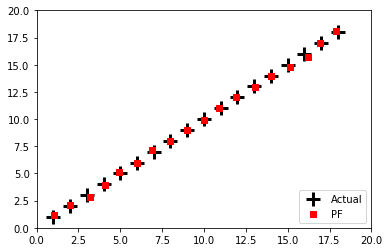

In [23]:
from numpy.random import seed
seed(2) 
run_pf1(N=5000, plot_particles=False)